In [1]:
%%capture otp
! python3 -m pip install --upgrade pip
! python3 -m pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np              # біблиотека для аналізу даних
import pandas as pd             # біблиотека для аналізу даних

import matplotlib.pyplot as plt # Інтерфейс Matplotlib
import seaborn as sns           # Інтерфейс Seaborn

In [4]:
from IPython.display import Image     # Вбудовані функції для зручної роботи
Image(url='https://seaborn.pydata.org/_static/logo-wide-lightbg.svg')

Seaborn is a Python data visualization library based on **matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [5]:
iris = pd.read_csv('../datasets/iris.csv', index_col='Id')
flights = pd.read_csv('../datasets/flights.csv')
mtcars = pd.read_csv('../datasets/mtcars.csv')

xs = np.linspace(0, 2, 100)
df = pd.DataFrame({'x': xs, 'y': xs, 'y2': xs ** 2, 'y3': xs ** 3})
df.head(3)

,x,y,y2,y3
0,0.000000,0.000000,0.000000,0.000000
1,0.020202,0.020202,0.000408,0.000008
2,0.040404,0.040404,0.001632,0.000066


In [73]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

## Налаштування

#### Налаштування Matplotlib

In [56]:
plt.ion()
%matplotlib inline

#### Стилі
https://seaborn.pydata.org/generated/seaborn.set_style.html  
`darkgrid, whitegrid, dark, white, ticks`

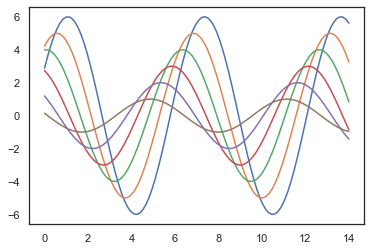

In [57]:
sns.set_style(style='white', rc=None)
sinplot()

#### Палітри
https://seaborn.pydata.org/tutorial/color_palettes.html  
``

In [66]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

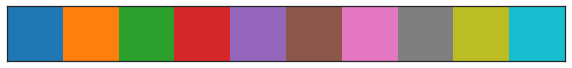

In [71]:
palette = sns.color_palette("tab10") # viridis, tab10
display(palette)
sns.palplot(palette)

In [72]:
sns.set_palette(palette)

#### Контекст
https://seaborn.pydata.org/generated/seaborn.set_context.html  
`paper, notebook, talk, poster`

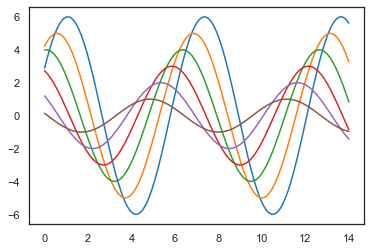

In [65]:
sns.set_context(context='notebook', font_scale=1, rc=None)
sinplot()

#### Розмір

In [46]:
sns.set(style='ticks', context='notebook', rc={'figure.figsize': (6.4, 4.8)})

### Як побудувати графік?

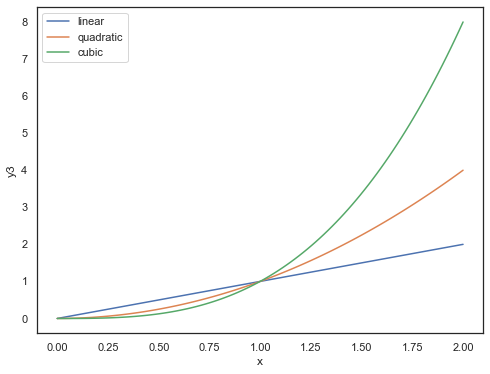

In [32]:
# Pyplot-style
plt.figure(figsize=[8,6])
sns.lineplot(x='x', y='y', label='linear', data=df)
sns.lineplot(x='x', y='y2', label='quadratic', data=df)
sns.lineplot(x='x', y='y3', label='cubic', data=df)
plt.show()

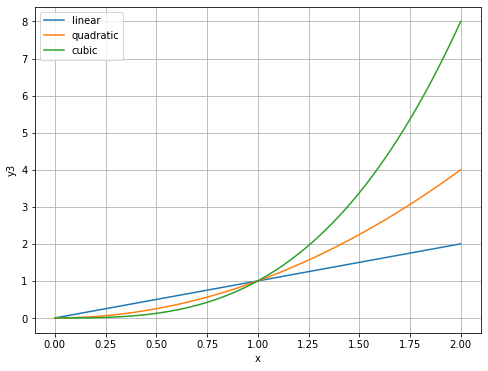

In [22]:
# OOP-style
# ax = plt.gca() # Get the current Axes instance on the current figure
fig, ax = plt.subplots(figsize=[8,6])
sns.lineplot(x='x', y='y', label='linear', data=df, ax=ax)
sns.lineplot(x='x', y='y2', label='quadratic', data=df, ax=ax)
sns.lineplot(x='x', y='y3', label='cubic', data=df, ax=ax)

ax.legend()  # Add a legend.
ax.grid() # Add grid
plt.show()

### Типи графіків
* **lineplot()** - лінійний графік
* **scatterplot()** - точковий графік
* **bar() / barh()** - стовпчикова діаграмма
* **pie()** - секторна діаграмма
* **hist()** - гістограмма
* **table()** - відображення таблиці на графіку
* **polar()** - полярний графік
* **imshow()** - відображення массивів пікселів
* **pcolor() / pcolormesh()** - heatmap-подібний графік
* **contour() / contourf()** - контурний графік
* **arrow()** - стрілка
* **quiver()** - поле векторів
* **streamplot()** - поток векторів
* **semilogx() / semilogy() / loglog()** - створення логарифмічних графіків 
### Додаткові функції
* **fill()** - відображення замкнених полігональних структур
* **fill_between()** - заповнює область між двома горизонтальними лініями
* **fill_betweenx()** - заповнює область між двома вертикальними лініями
* **axhspan()** - додає горизонтальний заповнений прямокутник
* **axvspan()** - додає вертикальний заповнений прямокутник
* **axhline()** - додає горизонтальну лінію
* **axvline()** - додає вертикальну лінію
* **legend()** - автоматичне створення легенди
* **grid()** - створення сітки на графіку

### Lineplot

### Scatterplot

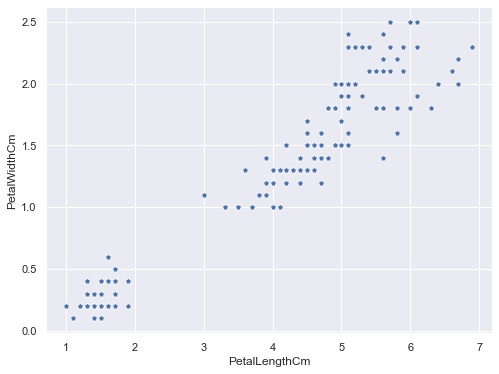

In [25]:
plt.figure(figsize=[8,6])
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', marker='p', data=iris)
plt.show()

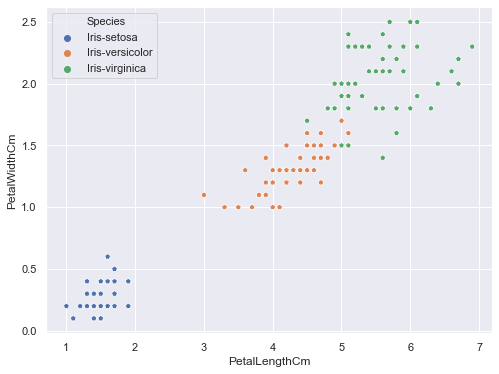

In [24]:
plt.figure(figsize=[8,6])
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', marker='p', data=iris)
plt.show()

### Plot

### Plot

### Plot

### Plot

### Матеріали
* https://learn.datacamp.com/courses/introduction-to-data-visualization-with-seaborn
* https://learn.datacamp.com/courses/intermediate-data-visualization-with-seaborn